# Studying baselines based on random initialization

In [1]:
from importlib import reload

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

from gptomics import model, composition as comp, svd

In [2]:
gpt125m = model.model_by_name("EleutherAI/gpt-neo-125M")

In [3]:
qk0_0 = gpt125m.QK(0, 0)

Initial tests

In [4]:
orig_baseline = comp.init_baseline_dist(qk0_0, qk0_0.shape, num_samples=1000, wikidenom=False)

100%|███████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 148.39it/s]


In [5]:
init_weight_baseline = comp.init_baseline_dist(qk0_0, qk0_0.shape, num_samples=1000, wikidenom=False, init_weight=True)

100%|███████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 148.26it/s]


In [6]:
def plot_arrays(*arrays, labels, numbins=50, **kwargs):
    _, bins = np.histogram(np.concatenate(arrays), numbins)
    
    for array, label in zip(arrays, labels):
        plt.hist(array, bins=bins, alpha=0.5, label=label, **kwargs)
    plt.legend()

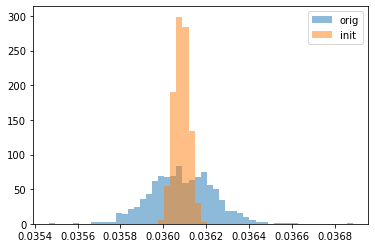

In [7]:
plot_arrays(orig_baseline, init_weight_baseline, labels=["orig", "init"])

Using a rank consistent with the attention head products

In [8]:
same_rank_baseline = comp.init_baseline_dist(
    qk0_0, qk0_0.shape, num_samples=1000,
    wikidenom=False, sample_rank=64,
)

100%|███████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 196.29it/s]


xavier uniform distribution

In [10]:
reload(comp)

<module 'gptomics.composition' from '/home/nt/Work/research/gpt-omics/gptomics/composition.py'>

In [11]:
init_same_rank_baseline = comp.init_baseline_dist(
    qk0_0, qk0_0.shape, num_samples=1000,
    wikidenom=False, init_weight=True, sample_rank=64,
)

100%|███████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 171.10it/s]


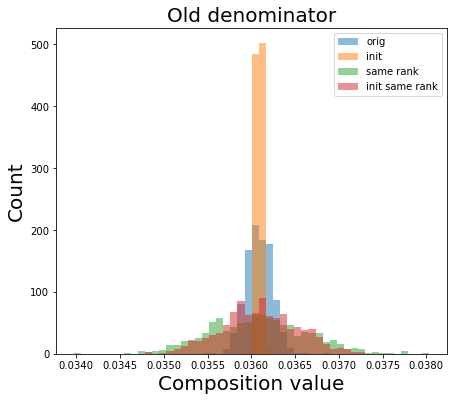

In [12]:
plt.figure(figsize=(7, 6))

plot_arrays(
    orig_baseline, init_weight_baseline,
    same_rank_baseline, init_same_rank_baseline,
    labels=["orig", "init", "same rank", "init same rank"])

plt.xlabel("Composition value", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Old denominator", fontsize=20)

plt.show()

Looks like the fixed matrix version does a good job of simulating the low-rank version (with full-rank init)

In [13]:
qksvd = gpt125m.QK(0, 0, factored=True)

In [14]:
orig_baseline_wd = comp.init_baseline_dist(qksvd, qksvd.shape, num_samples=100, wikidenom=True)

100%|██████████████████████████████████████████████████████████████████| 100/100 [00:26<00:00,  3.80it/s]


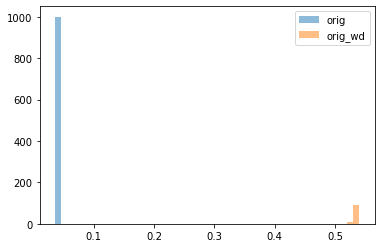

In [15]:
plot_arrays(
    orig_baseline, orig_baseline_wd,
    labels=["orig", "orig_wd"])

In [16]:
init_baseline_wd = comp.init_baseline_dist(qksvd, qksvd.shape, num_samples=100, wikidenom=True, init_weight=True)

100%|██████████████████████████████████████████████████████████████████| 100/100 [00:26<00:00,  3.75it/s]


In [17]:
init_baseline_wd2 = comp.init_baseline_dist(qksvd, qksvd.shape, num_samples=100, wikidenom=True, init_weight=True)

100%|██████████████████████████████████████████████████████████████████| 100/100 [00:25<00:00,  3.86it/s]


In [18]:
same_rank_baseline_wd = comp.init_baseline_dist(qksvd, qksvd.shape, num_samples=100, wikidenom=True, sample_rank=64)

100%|██████████████████████████████████████████████████████████████████| 100/100 [00:25<00:00,  3.94it/s]


In [19]:
init_same_rank_baseline_wd = comp.init_baseline_dist(qksvd, qksvd.shape, num_samples=100, wikidenom=True, init_weight=True, sample_rank=64)

100%|██████████████████████████████████████████████████████████████████| 100/100 [00:24<00:00,  4.15it/s]


In [27]:
init_same_rank_baseline_wd2 = comp.init_baseline_dist(qksvd, qksvd.shape, num_samples=100, wikidenom=True, init_weight=True, sample_rank=64)

100%|██████████████████████████████████████████████████████████████████| 100/100 [00:24<00:00,  4.06it/s]


In [20]:
np.linalg.matrix_rank(qk0_0)

64

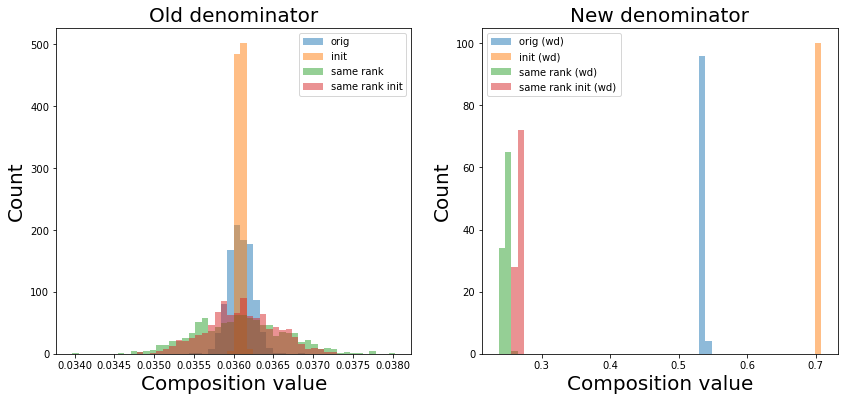

In [26]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_arrays(
    orig_baseline, init_weight_baseline,
    same_rank_baseline, init_same_rank_baseline,
    labels=["orig", "init", "same rank", "same rank init"])

plt.xlabel("Composition value", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Old denominator", fontsize=20)

plt.subplot(1, 2, 2)
plot_arrays(
    orig_baseline_wd, init_baseline_wd,
    same_rank_baseline_wd, init_same_rank_baseline_wd,
    labels=["orig (wd)", "init (wd)", "same rank (wd)", "same rank init (wd)"])

plt.xlabel("Composition value", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("New denominator", fontsize=20)

plt.show()

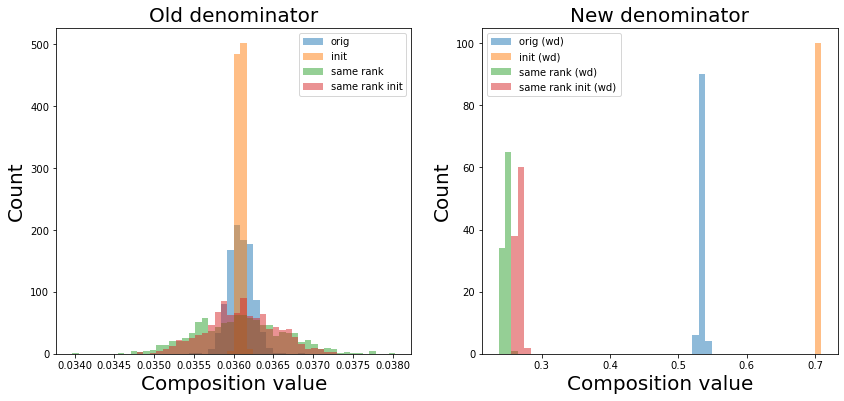

In [28]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_arrays(
    orig_baseline, init_weight_baseline,
    same_rank_baseline, init_same_rank_baseline,
    labels=["orig", "init", "same rank", "same rank init"])

plt.xlabel("Composition value", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("Old denominator", fontsize=20)

plt.subplot(1, 2, 2)
plot_arrays(
    orig_baseline_wd, init_baseline_wd2,
    same_rank_baseline_wd, init_same_rank_baseline_wd2,
    labels=["orig (wd)", "init (wd)", "same rank (wd)", "same rank init (wd)"])

plt.xlabel("Composition value", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title("New denominator", fontsize=20)

plt.show()